# Introduction

Our objective here will be to train a predictive model using the available data to learn what the profile of a person afflicted with Diabetes looks like. This model will then receive the profile of an untested individual, and based on that person's health indicators, measure the similarity of their profile against that of a person with diabetes, and assign that person a value that represents their predicted risk of having Diabetes.

Our end-goal is to better educate individuals on their diabetes risk factor, so the disease can be diagnosed and tackled earlier. The predictive model will serve as a means to impart (possibly life-saving) health literacy to its users.

# Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# Reading dataset


In [2]:
dataset = pd.read_csv('diabetes.csv')
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Data Visualization

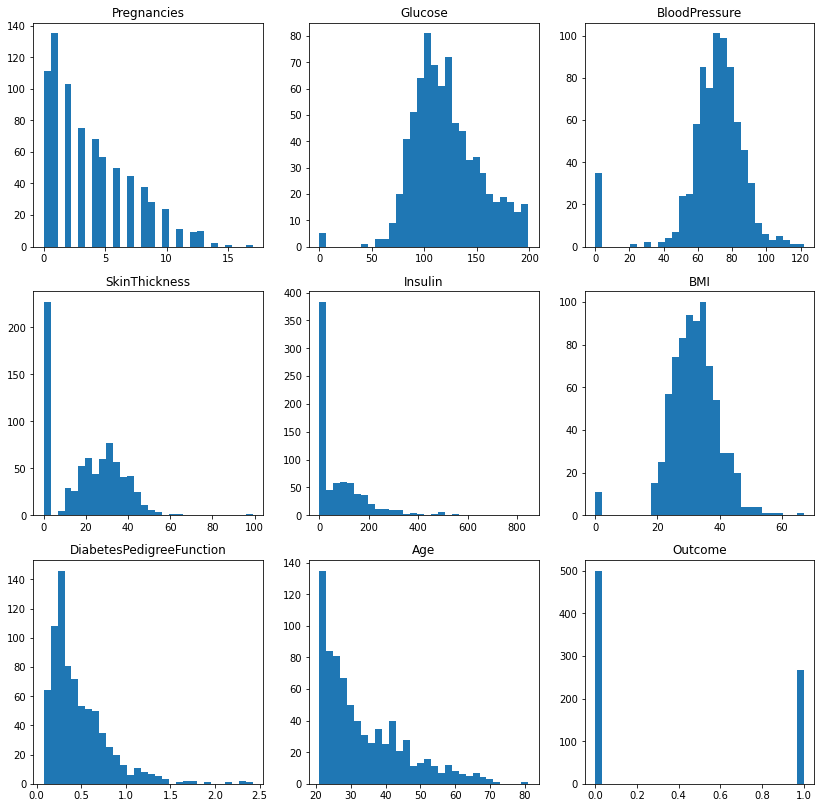

In [6]:
cols = dataset.columns.tolist()
fig = plt.figure(figsize=(14,14))

for position, col in enumerate(cols):
    ax = fig.add_subplot(3,3,position+1)
    ax.hist(dataset[col], bins=30)
    plt.title(col)

plt.show()

In [7]:
# Splitting dataframe

with_diabetes = dataset[dataset['Outcome'] == 1]
without_diabetes = dataset[dataset['Outcome'] == 0]

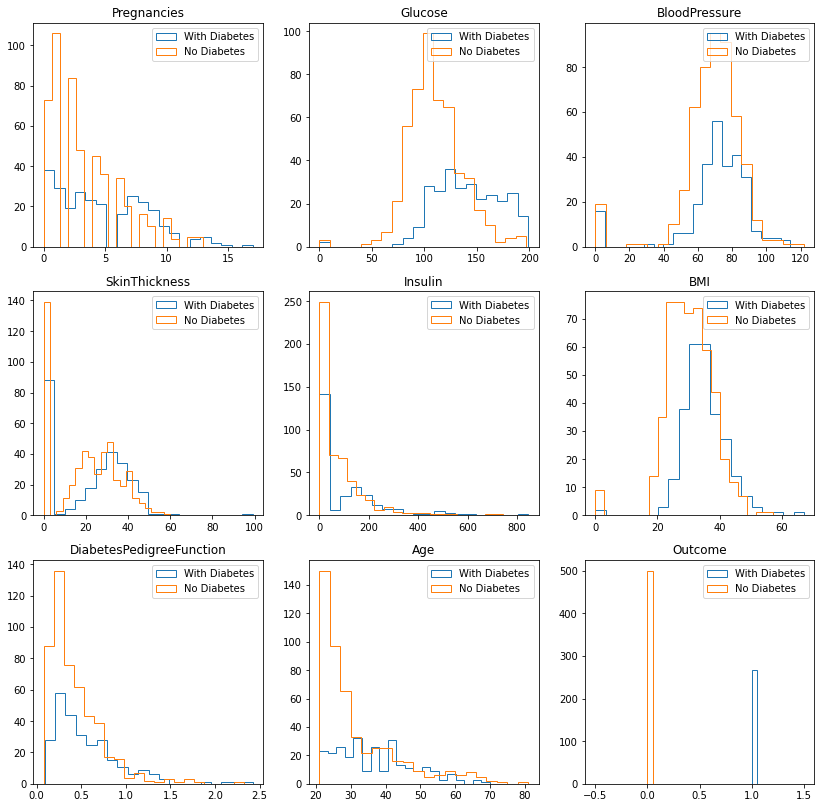

In [8]:
fig = plt.figure(figsize=(14,14))
for position, col in enumerate(cols):
    ax = fig.add_subplot(3,3,position+1)
    ax.hist(with_diabetes[col], histtype ='step', label='With Diabetes', bins = 20)
    ax.hist(without_diabetes[col], histtype ='step', label = 'No Diabetes', bins=20)
    ax.legend(loc=0)
    plt.title(col)

plt.show()

In [9]:
import seaborn as sns

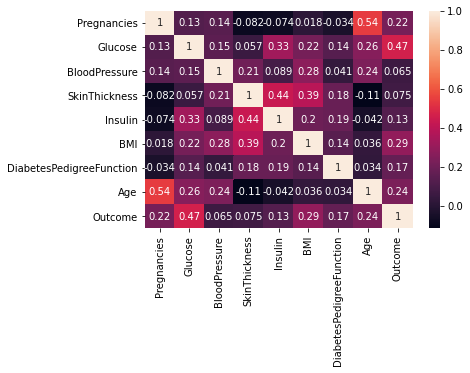

In [10]:
sns.heatmap(dataset.corr(), annot = True)
plt.show()


## Observations:

- The countplot tells us that the dataset is imbalanced, as number of patients who don't have diabetes is more than those who do.
    
- From the correaltion heatmap, we can see that there is a high correlation between Outcome and [Glucose,BMI,Age,Insulin]. We can select these features to accept input from the user and predict the outcome.



# Data Preprocessing

We want to clean the data to make it suitable to pass into a Machine Learning model. In particular, we should look out for the following things:

    - Duplicate entries
    - Incomplete Data (denoted by the several 0 values we saw above)
    - Outlier Data, or data that is very obviously incorrect.


## Dropping Duplicate Rows

In [11]:


dataset = dataset.drop_duplicates(keep='first')

dataset.shape



(768, 9)

## Handling incomplete Data

In [12]:
dataset = dataset.drop(dataset[dataset['BMI']==0].index) 
dataset = dataset.drop(dataset[dataset['BloodPressure']==0].index) 
dataset = dataset.drop(dataset[dataset['Insulin']==0].index)
dataset = dataset.drop(dataset[dataset['Glucose']==0].index)
dataset = dataset.drop(dataset[dataset['SkinThickness']==0].index)

dataset.shape

(392, 9)

## Feature Selection

The Pregnancies column contains information on number of pregnancies, but while there is a correlation between diabetes likelihood and number of pregnancies, our data-set does not actually distinguish between males and females. If, for instance, a male is more likely to have diabetes based on other indicators, we don't want the prediction for him having diabetes being marked down just because his number of Pregnancies is 0. To avoid the problem of the predictive model being confounded by this, we will get rid of the Pregnancies column.

There is also the fact that we have very limited understanding on how the DiabetesPedigreeFunction column's values are determined. This column measures an individual's hereditary predisposition to diabetes. Realistically, it is not going to be possible for an individual to input this measurement into our predictive model. We'll thus drop this column as well

In [13]:


features = cols.copy()
features.remove('Outcome')
features.remove('DiabetesPedigreeFunction')
features.remove('Pregnancies')


print(features)

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']


## Predictive Modelling - Logistic Regression

lets use Logistic Regression.  
 
The error metric we'll be focusing on for now is accuracy (total correct predictions/total predictions).

We will assess its accuracy with KFold Cross Validation, to use our data with maximum efficiency.

In [14]:
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

In [15]:
# Instantiate the model
weight = {
    1:1.05,
    0:1
}
log = LogisticRegression(class_weight = weight)

kf = KFold(n_splits=6) 
score = cross_val_score(log, dataset[features], dataset['Outcome'], cv=kf, scoring='accuracy')
print(score)
print("The mean accuracy is:",score.mean())

[0.81818182 0.71212121 0.72307692 0.83076923 0.87692308 0.78461538]
The mean accuracy is: 0.790947940947941




Using KFold cross validation with slightly more weight placed on a positive check for Diabetes, with 6 folds, we get an accuracy of around 79%.

We'll train this model on the entire data-set, and then enter in a custom values to see the probabilities of Diabetes assigned to us.


In [16]:
weight = {
    1:1.05,
    0:1
}

log_model = LogisticRegression(class_weight = weight)
log_model.fit(dataset[features], dataset['Outcome'])
log_model.predict_proba(np.array(dataset[features].iloc[0]).reshape(1, -1))

array([[0.95759497, 0.04240503]])

In [17]:
dataset[features].iloc[0]

Glucose          89.0
BloodPressure    66.0
SkinThickness    23.0
Insulin          94.0
BMI              28.1
Age              21.0
Name: 3, dtype: float64

In [18]:
testing1 = [120,10,100,190,50,60]
features

log_model.predict_proba(np.array(testing1).reshape(1, -1))[0,1]

0.9478842255658008

In [19]:
features

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']

define a function which receives inputs for the 6 feature columns, and then returns a Diabetes risk index.

In [20]:
def diabetes_risk_prediction(glucose, bp, skinthickness, insulin, bmi, age):
    indicator_list = [glucose, bp, skinthickness, insulin, bmi, age]
    predictions = log_model.predict_proba(np.array(indicator_list).reshape(1, -1))
    risk = predictions[0,1]
    print("-"*len("Health Indicator Analysis"))
    print("Health Indicator Analysis")
    print("-"*len("Health Indicator Analysis"))   
    if risk < 0.3:
        print("You are probably in good health, keep it up.")   
    elif risk > 0.9:
        print("Go to a hospital. Odds are high you have diabetes.")
    
    elif risk > 0.7:
        print("See a doctor as soon as you can . You might be on the way to developing diabetes if you don't change your lifestyle.")
        

   
    return print("Your Diabetes Risk Index is {:.2f}/50.".format(risk*0.5*100))
    
diabetes_risk_prediction(90,80,30,120,60,50)


-------------------------
Health Indicator Analysis
-------------------------
Your Diabetes Risk Index is 32.81/50.


Re-instantiate the logistics regression and model and re-fit the data.

In [21]:
def diabetes_risk_prediction2(glucose, bp, skinthickness, insulin, bmi, age):
    weight = {
    1:1.05,
    0:1}

    log_model2 = LogisticRegression(class_weight = weight)
    log_model2.fit(dataset[features], dataset['Outcome'])
    
    indicator_list = [glucose, bp, skinthickness, insulin, bmi, age]
    predictions = log_model2.predict_proba(np.array(indicator_list).reshape(1, -1))
    risk = predictions[0,1]
    return risk

diabetes_risk_prediction2(100,80,30,120,30,45) #Test array.

0.22443666622161737

In [22]:
import pickle
pickle.dump(log_model,open('log.pkl','wb'))

## Taking User Inputs and generating a Risk Index

In [23]:
while True:
    try:
        while True:
            Glucose = int(input("Enter your Blood Glucose Level (mg/DL):\n"))
            if Glucose > 0:
                    break
            else:
                print("Please enter a valid value")
        break
    except (ValueError, NameError):# if the input is invalid 
        print("Invalid input! Please choose again.") #prompts user to input valid action
        continue

while True:
    try:
        while True:
            BloodPressure = int(input("Enter your Blood Pressure (mmHg):\n"))
            if BloodPressure > 0:
                    break
            else:
                print("Please enter a valid value")
        break
    except (ValueError, NameError):# if the input is invalid 
        print("Invalid input! Please choose again.") #prompts user to input valid action
        continue
        
while True:
    try:
        while True:
            SkinThickness = int(input("Enter your Skin Thickness (mm):\n"))
            if SkinThickness > 0:
                    break
            else:
                print("Please enter a valid value")
        break
    except (ValueError, NameError):# if the input is invalid 
        print("Invalid input! Please choose again.") #prompts user to input valid action
        continue
        
while True:
    try:
        while True:
            Insulin = int(input("Enter your Insulin Level (mg/DL):\n"))
            if Insulin > 0:
                    break
            else:
                print("Please enter a valid value")
        break
    except (ValueError, NameError):# if the input is invalid 
        print("Invalid input! Please choose again.") #prompts user to input valid action
        continue
        

while True:
    try:
        while True:
            BMI = int(input("Enter your BMI:\n"))
            if BMI > 0:
                    break
            else:
                print("Please enter a valid value")
        break
    except (ValueError, NameError):# if the input is invalid 
        print("Invalid input! Please choose again.") #prompts user to input valid action
        continue    

while True:
    try:
        while True:
            Age = int(input("Enter your Age (Years):\n"))
            if Age > 0:
                    break
            else:
                print("Please enter a valid value")
        break
    except (ValueError, NameError):# if the input is invalid 
        print("Invalid input! Please choose again.") #prompts user to input valid action
        continue
        
diabetes_risk_prediction(Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age)

Enter your Blood Glucose Level (mg/DL):
200
Enter your Blood Pressure (mmHg):
150
Enter your Skin Thickness (mm):
35
Enter your Insulin Level (mg/DL):
160
Enter your BMI:
26
Enter your Age (Years):
25
-------------------------
Health Indicator Analysis
-------------------------
See a doctor as soon as you can . You might be on the way to developing diabetes if you don't change your lifestyle.
Your Diabetes Risk Index is 37.13/50.


## Things to be done

- Use an error metric other than accuracy score, like f1 score or precision.
- improving the code. I have written some from scratch and some was ref from various sources (stackoverflow, documentation etc.)
- improving efficiency 
- working on a larger dataset
- implementing different algorithms
